<a href="https://colab.research.google.com/github/Alexey198268/Python/blob/main/da_28_diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Первичная загрузка данных

Имеются исходные данные о продажах магазинов за период с 05.02.2010 по 01.11.2012.. Также есть информация о дополнительных факторах, относящихся к магазину, отделу и региональной активности на указанные даты. Это температура воздуха, стоимость топлива в регионе, индекс потребительских цен, уровень безработицы, признак, является ли неделя праздничной. 

Произведем первичную загрузку данных, а также поверхностное ознакомление (размер, колонки, структура).

In [ ]:
import pandas as pd #импортируем библиотеку для работы

#   файлы находятся на диске Google, откроем их по ссылкам и сохраним 
#   в соответствующие переменные factors (факторы), sales (продажи), stores (магазины):

In [ ]:
url_f = 'https://drive.google.com/file/d/1cVc4wjE97a3zdrYTAYDsai6OUDryd7kz/view?usp=sharing'
path_f = 'https://drive.google.com/uc?export=download&id='+url_f.split('/')[-2]
factors = pd.read_csv(path_f)

In [ ]:
url_s = 'https://drive.google.com/file/d/17YKsUkXp70APu0Lj_m8lnSDAU58eOPIC/view?usp=sharing'
path_s = 'https://drive.google.com/uc?export=download&id='+url_s.split('/')[-2]
sales = pd.read_csv(path_s)

In [ ]:
url_st = 'https://drive.google.com/file/d/1gcNFT-ZMHfFP-glB8fN_Kd3t-pF0cKHS/view?usp=sharing'
path_st = 'https://drive.google.com/uc?export=download&id='+url_st.split('/')[-2]
stores = pd.read_csv(path_st)

## 1.1. Факторы
Более подробно рассмотрим первый файл, в котором содержится информация о дополнительных факторах. Он загружен в переменную factors.

In [ ]:
factors.head() #смотрим визуально на первые 5 строк файла

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
factors.shape #оцениваем размер файла (строки, столбцы)

(8190, 12)

In [ ]:
factors.columns #выводим список колонок файла

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [ ]:
factors.dtypes #смотрим на типы каждой колонки файла 

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

## 1.2. Продажи.
Рассмотрим файл с историей продаж исследуемой сети магазинов. Он записан в переменную sales.

In [ ]:
sales.head() #посмотрим визуально на первые пять строк данных

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
sales.shape #выведем данные о количестве строк и столбцов файла

(421570, 5)

In [ ]:
sales.columns #выведем список наименований колонок файла

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [ ]:
sales.dtypes #посмотрим на типы колонок файла

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

## 1.3. Магазины.
Рассмотрим последний файл, в котором содержится справочная информация о исследуемых магазинах. Он записан в переменную stores.

In [ ]:
stores.head() #выведем первые пять строк датасета

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.shape #оценим размер датасета (строк, столбцов) 

(45, 3)

In [ ]:
stores.columns #выведем перечень наименований колонок файла

Index(['Store', 'Type', 'Size'], dtype='object')

In [ ]:
stores.dtypes #посмотрим на типы данных колонок файла

Store     int64
Type     object
Size      int64
dtype: object

# 2. Изучение, подготовка данных

На данном этапе произведем подробное изучение каждого датасета, проверим их на пропуски, ошибки, выбросы. Проведем проверку на пропуски, обогащение данными, очистку, замену, удаление ненужной информации и т.д.

## 2.1. Факторы.

Рассмотрим основные характеристики датасета factors

In [ ]:
factors.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Видим, что имеются пропущенные значения. Исследуем датасет с факторами на предмет пропусков. Для этого сначала построим с помощью пакета визуализации seaborn тепловую карту. 

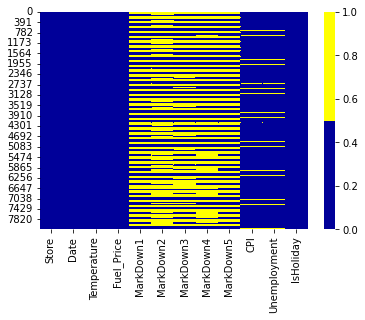

In [ ]:
import seaborn as sns
colours = ['#000099', '#ffff00'] 
sns.heatmap(factors.isnull(), cmap=sns.color_palette(colours))

Видим, что отсутствующие значения имеются в большом количестве в столбцах с информацией о скидках (MarkDown1 - 5), также есть небольшое количество отсутствующих значений в столбцах с информацией об индексе потребительских цен (CPI) и информацией об уровне безработицы (Unemployment). Посчитаем пропуски в процентах:

In [ ]:
(factors.isna().mean()*100).round(2)

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown2       64.33
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64

Теперь посчитаем пропуски в абсолютном значении:

In [ ]:
factors.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Сначала поработаем со столбцами, которые содержат информацию о скидках. Из описания датасета: "MarkDown1-5 - анонимные данные, связанные с рекламными скидками. Данные MarkDown доступны только после ноября 2011 г. и доступны не для всех магазинов постоянно. Любое отсутствующее значение отмечается NA." В связи с тем, что много данных отсутствует, а ценность заполненных представляется сомнительной, уберем эти столбцы из анализируемого датасета

In [ ]:
factors = factors[['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]

Теперь в датасете остаются пропуски в столбцах с информацией об индексе потребительских цен и уровне безработицы. Предполагаем, что такие показатели не меняются кардинально в короткий промежуток времени и заменим пропуски предыдущим значением показателя. 

Также перед этим произведем теперь замену типа данных в столбце Date (на дату) и в столбце Store (на строку, т.к. это категориальный признак). 

In [ ]:
factors['Date'] = pd.to_datetime(factors['Date'], dayfirst=True) 
factors['Store'] = factors['Store'].astype(str)

In [ ]:
# отсортируем данные по магазину и дате
factors.sort_values(['Store', 'Date'], inplace = True)
# заменим пропущенные значения на предыдущее значение
factors['CPI'].fillna(method = 'backfill', inplace=True)
factors['Unemployment'].fillna(method = 'backfill', inplace=True)

In [ ]:
# factors.isna().sum()
factors.isna().sum()

Store            0
Date             0
Temperature      0
Fuel_Price       0
CPI             13
Unemployment    13
IsHoliday        0
dtype: int64

Остались незаполненные значения по ИПЦ и безработице, заполним их следующим значением.

In [ ]:
factors['CPI'].fillna(method = 'ffill', inplace=True)
factors['Unemployment'].fillna(method = 'ffill', inplace=True)

In [ ]:
factors.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
factors.reset_index(drop=True, inplace=True)

In [ ]:
factors.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [ ]:
factors.dtypes

Store                   object
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

Датафрейм готов к дальнейшей работе.

## 2.2 Продажи.

Рассмотрим более подробно датасет с данными по продажам.

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Для начала переведем колонку Date в тип данных дата, а колонку Store в строковый тип, как сделали это с датасетом факторов.

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True) 
sales['Store'] = sales['Store'].astype(str)

Теперь рассмотрим более подробно данные по объемам продаж. В сводной информации были замечены отрицательные значения, это вызывает вопросы. Посмотрим визуализацию "ящик с усами" и гистограмму распределения значений.

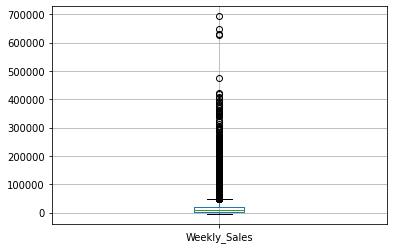

In [ ]:
import matplotlib.pyplot as plt
sales.boxplot(column='Weekly_Sales')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f177d005d50>]],
      dtype=object)

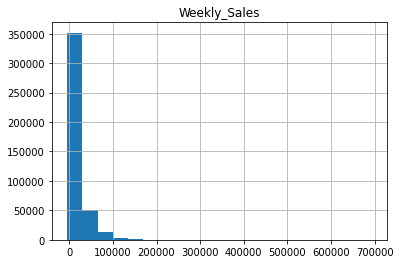

In [ ]:
sales.hist(column='Weekly_Sales', bins=20)

Более подробно рассмотрим присутствующие отрицательные значения. Видимо, это возвраты товара.

In [ ]:
sales[sales['Weekly_Sales']<0].count()

Store           1285
Dept            1285
Date            1285
Weekly_Sales    1285
IsHoliday       1285
dtype: int64

Также проверим наличие нулевых значений в продажах.

In [ ]:
sales[sales['Weekly_Sales']==0].count()

Store           73
Dept            73
Date            73
Weekly_Sales    73
IsHoliday       73
dtype: int64

Чтобы не искажать данные, оставим в датафрейме только строки с ненулевыми и положительными значениями продаж.

In [ ]:
sales.shape

(421570, 5)

In [ ]:
sales = sales[sales['Weekly_Sales'] >0]

In [ ]:
sales.shape

(420212, 5)

In [ ]:
sales.describe()

,Dept,Weekly_Sales
count,420212.000000,420212.000000
mean,44.241309,16033.114591
std,30.508819,22729.492116
min,1.000000,0.010000
25%,18.000000,2120.130000
50%,37.000000,7661.700000
75%,74.000000,20271.265000
max,99.000000,693099.360000


Данный датафрейм также готов к дальнейшей работе.

## 2.3 Магазины

Проверим последний датафрейм, содержащий дополнительную информацию о магазинах. 

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Как видим, датафрейм содержит только 45 строк, по числу магазинов, составляющих анализируемую торговую сеть. Столбец Type заполнен полностью, здесь вопросов нет. Столбец Size также без нулевых и отрицательных значений. Для дальнейшей работы поменяем только тип данных в столбце Store на строковый.

In [ ]:
stores['Store'] = stores['Store'].astype(str)

# 3.  Подготовка данных к построению модели.

Для дальнейшей работы необходимо подготовить данные, чтобы они были пригодны к обучению модели. Для начала обогатим датафрейм с продажами информацией о дополнительных факторах, а также данными о характеристиках магазинов.

In [ ]:
sales_factors = pd.merge(sales, factors, on=['Store','Date'], how='left') #добавим в датасет с продажами информацию о дополнительных факторах из датасета factors

In [ ]:
sales_factors.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,False


In [ ]:
final_df = pd.merge(sales_factors, stores, on =['Store'], how = 'left')  # обогатим промежуточный датафрейм информацией о типе и размере каждого из 45 магазинов

In [ ]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315


In [ ]:
final_df.shape

(420212, 12)

Теперрь необходимо из столбца с датой выделить признаки - число, месяц, год, день недели, чтобы использовать их в обучении модели. Создадим соответсвующие дополнительные столбцы.

In [ ]:
final_df['weekday'] = final_df['Date'].dt.weekday
final_df['year'] = final_df['Date'].dt.year
final_df['month'] = final_df['Date'].dt.month
final_df['day'] = final_df['Date'].dt.day
final_df['week'] = final_df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,weekday,year,month,day,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,4,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,4,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315,4,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315,4,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315,4,2010,3,5,9


In [ ]:
#сохраним датафрейм в файл csv для работ по построению дашборда в стороннем приложении (tableau)
# final_df.to_csv('sales.csv', encoding='utf-8', index=False)

In [ ]:
final_df['weekday'].unique()

array([4])

Как видим, все даты приходятся на один день недели, поэтому данную колонку weekday нет смысла использовать в качестве фактора.
Также колонки IsHoliday_x	и IsHoliday_y дублируют друг друга, можно убрать одну из набора данных для построения модели. Использовать в факторах год и день также необоснованно.

In [ ]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'weekday', 'year', 'month', 'day', 'week'],
      dtype='object')

In [ ]:
final_df.dtypes

Store                   object
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x               bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
Type                    object
Size                     int64
weekday                  int64
year                     int64
month                    int64
day                      int64
week                     int64
dtype: object

Переведем категориальные столбцы в строковый тип.

In [ ]:
final_df['Dept'] = final_df['Dept'].astype(str)
final_df['month'] = final_df['month'].astype(str)
final_df['week'] = final_df['week'].astype(str)
final_df['IsHoliday_x'] = final_df['IsHoliday_x'].astype(str)

In [ ]:
final_df = final_df[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
       'month', 'week']]

In [ ]:
final_df1 = final_df.drop('week', 1)
final_df1.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,month
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,3


In [ ]:
categorical_columns = ['Store', 'Dept', 'IsHoliday_x', 'Type', 'month', 'week']
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',  'Size']

Теперь определим, какие колонки как категориальные необходимо разложить на признаки по столбцам. 

In [ ]:
#категории на столбцы через dummies
fin_dummies = pd.get_dummies(final_df[categorical_columns])

In [ ]:
fin_dummies.columns

Index(['Store_1', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18',
       ...
       'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52',
       'week_6', 'week_7', 'week_8', 'week_9'],
      dtype='object', length=195)

In [ ]:
fin_dummies[['IsHoliday_x_True','IsHoliday_x_False']].head()

,IsHoliday_x_True,IsHoliday_x_False
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
fin_dummies.shape

(420212, 195)

In [ ]:
fin_num = final_df[numeric_columns]

In [ ]:
fin_num.shape

(420212, 6)

In [ ]:
fin = pd.concat([fin_dummies, fin_num], sort = False, axis=1)

In [ ]:
fin.shape

(420212, 201)

In [ ]:
fin.head()

,Store_1,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_2,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_3,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_4,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,...,week_26,week_27,week_28,week_29,week_3,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_4,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_5,week_50,week_51,week_52,week_6,week_7,week_8,week_9,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,24924.50,42.31,2.572,211.096358,8.106,151315
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,46039.49,38.51,2.548,211.242170,8.106,151315
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,41595.55,39.93,2.514,211.289143,8.106,151315
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19403.54,46.63,2.561,211.319643,8.106,151315
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21827.90,46.50,2.625,211.350143,8.106,151315


Полученный датафрейм fin готов к применению в качестве данных для обучения модели.

# 4. Обучение и оценка модели прогноза выручки.

## 4.1. Модель линейной регрессии 

В качестве первого варианта используем модель линейной регрессии и посмотрим на ее качество.

In [ ]:
from sklearn.linear_model import LinearRegression # импорт модели линейной регрессии
from sklearn.model_selection import train_test_split #загружаем необходимые модули для построения модели
X = fin.drop('Weekly_Sales', 1) # набор данных для обучения факторы
y = fin['Weekly_Sales'] #набор данных для обучения результат
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15) # разбиваем выборку на обучающую и тестовую
model = LinearRegression()
model.fit(X_train, y_train) # производим обучение модели на наших данных
model.score(X_test, y_test) # считаем коэффициент детерминации
# Чем ближе значение коэффициента детерминации к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным.

0.66337351233993

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 170107080.99
Variance score: 0.66


In [ ]:
X_test.shape

(84043, 200)

In [ ]:
import numpy as np
X = np.arange(0, 84043, 1)

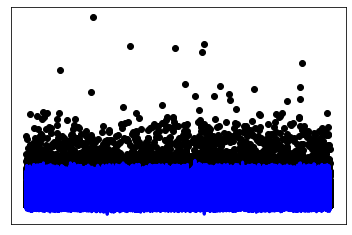

In [ ]:
plt.scatter(X, y_test,  color='black')
plt.plot(X, predictions, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Качество предсказания модели линейной регрессии - 66%. Показатель невысокий.

## 4.2. Модель RandomForestRegressor

Рассмотрим модель случайного леса и посмотрим на ее качество.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = fin.drop('Weekly_Sales', 1) # набор данных для обучения факторы
y = fin['Weekly_Sales'] #набор данных для обучения результат
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15) # разбиваем выборку на обучающую и тестовую
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test, sample_weight=None)
# #The best possible score is 1.0

0.2360463637295951

Очень низкий показатель, 0.236

## 4.3. Модель GradientBoostingRegressor

Проверим модель градиентного бустинга и посмотрим на ее качество.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X = fin.drop('Weekly_Sales', 1) # набор данных для обучения факторы
y = fin['Weekly_Sales'] #набор данных для обучения результат
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(X_test)
reg.score(X_test, y_test)

0.72802853783552

Качество предсказания модели градиентного бустинга - 73%. Результат лучше всех проверенных моделей. Остановимся на нем и произведем дополнительную отладку.

Попробуем оптимизировать модель. Произведем подбор параметров обучения модели с помощью RandomizedSearchCV:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboost = GradientBoostingRegressor()
from sklearn.model_selection import RandomizedSearchCV
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
n_estimators = [100, 200, 300]
max_depth = [2, 4, 6]
min_samples_leaf = [2, 4, 6] 
min_samples_split = [2, 4, 6]
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gradientboost,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=2,
            scoring = 'r2',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_iter=2,
                   n_jobs=4,
                   param_distributions={'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 4, 6],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

Поиск более оптимальных параметров выдал такие результаты:

In [ ]:
random_cv.best_params_

{'loss': 'huber',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 300}

Произведем обучение модели градиентного бустинга с этими оптимизированными параметрами:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X = fin.drop('Weekly_Sales', 1) # набор данных для обучения факторы
y = fin['Weekly_Sales'] #набор данных для обучения результат
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0, loss = 'huber', max_depth = 4, max_features = None, min_samples_split = 4, min_samples_leaf = 6, n_estimators = 300)
reg.fit(X_train, y_train)
# GradientBoostingRegressor(random_state=0, loss = 'quantile', max_depth = 4, max_features = 'sqrt', min_samples_split = 2, min_samples_leaf = 6, n_estimators = 200)
reg.predict(X_test)
reg.score(X_test, y_test)

0.8203092181995977

В результате качество модели значительно улучшилось: r2 =  0,82. 